In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from random import randint
from time import sleep


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
print('Beginning Data Retrieval')
print('-----------------------------')

cityinfo = {}
Set = 1
Rec = 1

for city in cities:
    if Set <= 5:
        if Rec <= 50:
            print(f"Processing Record {Rec} of Set {Set} | {city}")
            url = "http://api.openweathermap.org/data/2.5/weather?q=" + str(city) + "&APPID=" + str(api_key)
            response = requests.get(url)        
            #print("Server Response: " + str(response))
            response_json = response.json()
            if not response_json["cod"] =='404':
                cityinfo[city] = response_json
            else:   
                print("City not found. Skipping...")
            Rec += 1
        else:        
            sleep(randint(60,61))
            Set += 1
            Rec = 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | narrabri
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ucluelet
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | basoko
Processing Record 15 of Set 1 | north bend
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | toksovo
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | micheweni
Processing Record 20 of Set 1 | santiago
Processing Record 21 of Set 1 | lolua
City not found. Skipping...
Processing Record 

Processing Record 31 of Set 4 | cepelare
City not found. Skipping...
Processing Record 32 of Set 4 | kapaa
Processing Record 33 of Set 4 | ode
Processing Record 34 of Set 4 | makokou
Processing Record 35 of Set 4 | anadyr
Processing Record 36 of Set 4 | rungata
City not found. Skipping...
Processing Record 37 of Set 4 | manokwari
Processing Record 38 of Set 4 | vallenar
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | ourem
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | tecoanapa
Processing Record 44 of Set 4 | can tho
Processing Record 45 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 4 | ratnagiri
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | kaeo
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | mayumba
Processing Record 2 of Set 5 | pangnirtung
Proces

In [5]:
cityinfo


{'yellowknife': {'coord': {'lon': -114.38, 'lat': 62.45},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 240.15,
   'pressure': 1033,
   'humidity': 67,
   'temp_min': 240.15,
   'temp_max': 240.15},
  'visibility': 24140,
  'wind': {'speed': 2.6, 'deg': 30},
  'clouds': {'all': 20},
  'dt': 1547427600,
  'sys': {'type': 1,
   'id': 1007,
   'message': 0.0029,
   'country': 'CA',
   'sunrise': 1547484484,
   'sunset': 1547505943},
  'id': 6185377,
  'name': 'Yellowknife',
  'cod': 200},
 'san quintin': {'coord': {'lon': 120.52, 'lat': 17.54},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 299.778,
   'pressure': 986.05,
   'humidity': 63,
   'temp_min': 299.778,
   'temp_max': 299.778,
   'sea_level': 1026.98,
   'grnd_level': 986.05},
  'wind': {'speed': 1.57, 'deg': 21.5025},
  'clouds': {'all': 0

In [20]:
dictionary = {}
keys = ['City', 'Lat','Lng','Max Temp','Humidity','Wind Speed','Cloudiness','Date','Country']
values = []
cities = []

for city, val in cityinfo.items():
    values.clear()
    values.append(city)
    value = val
    
    for key, valA in value.items():           
        valB = valA
        if key == 'sys':  
            values.append(valB['country'])
            
        if key == 'main':     
            values.append(valB['temp_max'])
            
        if key == 'main':
            values.append(valB['humidity'])
            
        if key == 'wind':  
            values.append(valB['speed'])
            
        if key == 'dt':
            values.append(valA)
            
        if key == 'coord':
            values.append(valB['lat'])
            values.append(valB['lon'])
            
        if key == 'clouds':
            values.append(valB['all'])
    dictionary = dict(zip(keys, values))
    cities.append(dictionary)

    
df = pd.DataFrame(cities)
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,20,CA,1547427600,67,62.45,-114.38,240.150,2.60
1,san quintin,0,PH,1547432076,63,17.54,120.52,299.778,1.57
2,mataura,36,NZ,1547432076,78,-46.19,168.86,290.028,3.37
3,narrabri,32,AU,1547427600,20,-30.33,149.78,307.150,4.60
4,saint george,0,GR,1547430600,80,39.45,22.34,272.150,2.60


In [21]:
df.to_csv("cities.csv", encoding='utf-8')

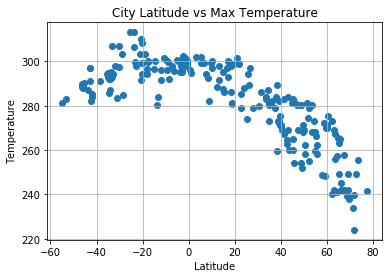

In [22]:

plt.scatter(df["Lat"], df["Max Temp"], marker="o")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatTemp.png")

# Show plot
plt.show()

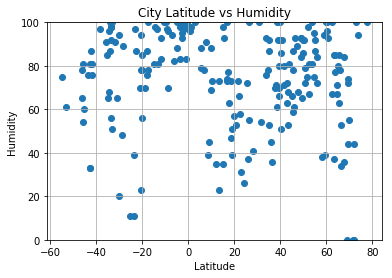

In [23]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,100)

# Save the figure
plt.savefig("LatHum.png")

# Show plot
plt.show()

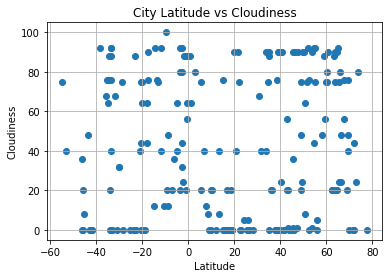

In [24]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatCloud.png")

# Show plot
plt.show()

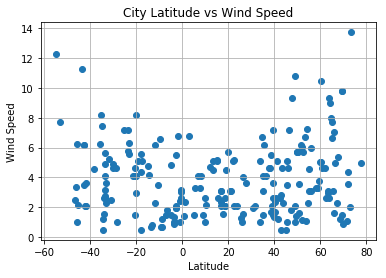

In [25]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatWS.png")

# Show plot
plt.show()